In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x,y,z,sx,sy,sz,H = np.loadtxt('seq_out.txt').T
S = (sx**2+sy**2+sz**2)**0.5
print('Total energy of system',H[0])
print(f'Total x spin: {np.sum(sx):.1f}\nTotal y spin: {np.sum(sy):.1f}\nTotal z spin: {np.sum(sz):.1f}')
print('Number of spins: ',len(S))

Total energy of system -38.9269
Total x spin: -1.7
Total y spin: -8.9
Total z spin: 59.3
Number of spins:  10000


In [ ]:
#plt.hist(S,300,histtype = 'step');
#plt.yscale('log')
#plt.show()
plt.hist([sx,sy,sz],300,histtype = 'step',label = ['x','y','z']);
plt.legend()

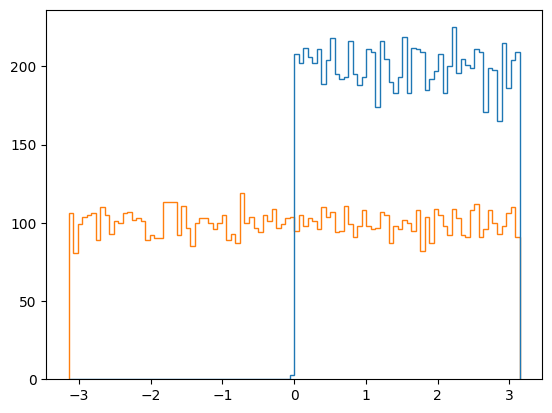

In [3]:
plt.hist([np.arccos(sz/S),np.sign(sy)*np.arccos(sx/np.sqrt(sx**2+sy**2))],100,histtype='step',label = ['theta','phi']);
